# Sample Analysis Dasyboard

In [81]:
import pandas as pd
import psycopg2, configparser
import matplotlib.pyplot as plt

pd.set_option('display.max_colwidth', -1)

# Configuration
config = configparser.ConfigParser()
config.read('config.cfg')

['config.cfg']

In [ ]:
# Redshift connection setup
conn = psycopg2.connect("host={} dbname={} user={} password={} port={}".format(*config['CLUSTER'].values()))

In [71]:
business_id = 'u_vPjx925UPEG9DFOAAvFQ'

## Rating

In [9]:
try:    
    with conn.cursor() as cur:
        cur.execute("""
        select avg(stars)
        from review
        where business_id = '{}'
        """.format(business_id))

        print("Average rating: {}".format(cur.fetchone()[0]))
except Exception as err:
    print("Error: ", err)
    conn.rollback()

Average rating: 3.43478260869565


## Review count

In [72]:
try:    
    with conn.cursor() as cur:
        cur.execute("""
        select 
        EXTRACT(year from date) as year, 
        EXTRACT(month from date) as month,
        count(*)
        from review
        where business_id = '{}'
        group by year, month
        order by year desc, month desc
        limit 10
        """.format(business_id))
        
        data = cur.fetchall()
        data.reverse()
        
        times = [f"{str(row[0])}/{str(row[1])}" for row in data]
        counts = [row[2] for row in data]
                
        df = pd.DataFrame(
            [[f"{str(row[0])}/{str(row[1])}", row[2]] for row in data],
            columns = ['time', 'count'])
        
except Exception as err:
    print("Error: ", err)
    conn.rollback()

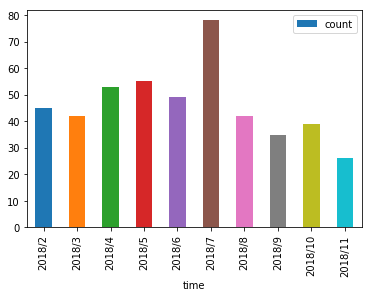

In [73]:
df.plot(kind='bar',x='time',y='count')

## Review count from Yelp Elite and their friends

In [76]:
try:    
    with conn.cursor() as cur:
        cur.execute("""
        select 
        EXTRACT(year from date) as year, 
        EXTRACT(month from date) as month,
        count(*)
        from review r
        where r.business_id = '{}'
        and exists (select 1 
                    from yelp_user_elite yue 
                    where r.user_id = yue.user_id and yue.year = 2018)
        and exists (select 1 
                    from yelp_user_elite yue
                    inner join yelp_user_friend yuf on yue.user_id = yuf.user_id
                    where r.user_id = yuf.friend_id and yue.year = 2018)
        group by year, month
        order by year desc, month desc
        limit 10
        """.format(business_id))
        
        data = cur.fetchall()
        data.reverse()
        
        times = [f"{str(row[0])}/{str(row[1])}" for row in data]
        counts = [row[2] for row in data]
                
        df = pd.DataFrame(
            [[f"{str(row[0])}/{str(row[1])}", row[2]] for row in data],
            columns = ['time', 'count'])
        
except Exception as err:
    print("Error: ", err)
    conn.rollback()

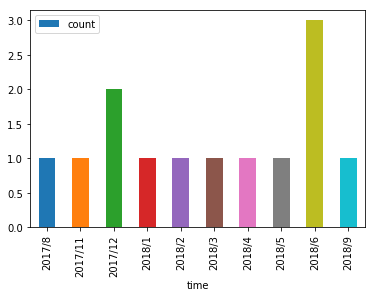

In [77]:
df.plot(kind='bar',x='time',y='count')

## Checkin count

In [74]:
try:    
    with conn.cursor() as cur:
        cur.execute("""
        select 
        EXTRACT(year from date) as year, 
        EXTRACT(month from date) as month,
        count(*)
        from checkin
        where business_id = '{}'
        group by year, month
        order by year desc, month desc
        limit 10
        """.format(business_id))
        
        data = cur.fetchall()
        data.reverse()
        
        times = [f"{str(row[0])}/{str(row[1])}" for row in data]
        counts = [row[2] for row in data]
                
        df = pd.DataFrame(
            [[f"{str(row[0])}/{str(row[1])}", row[2]] for row in data],
            columns = ['time', 'count'])
        
except Exception as err:
    print("Error: ", err)
    conn.rollback()

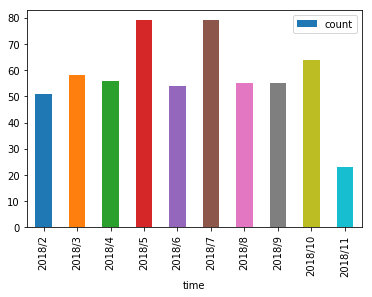

In [75]:
df.plot(kind='bar',x='time',y='count')

## Recent reviews

In [83]:
try:    
    with conn.cursor() as cur:
        cur.execute("""
        select review_id, date, stars, text
        from review
        where business_id = '{}'
        order by date desc
        limit 5
        """.format(business_id))
                        
        df = pd.DataFrame(cur.fetchall(),
            columns = ['review_id', 'date', 'stars', 'text'])
        
except Exception as err:
    print("Error: ", err)
    conn.rollback()

In [84]:
df

,review_id,date,stars,text
0,GNB1BM1nTsGaaaMyYAaIug,2018-11-14 00:18:42,3.0,stayed here for 3 nights in one of their updated rooms. i would give it a 5 for the view from our room. we had a perfect view of the bellagio fountains. the curtains in the room were really nice. they kept out all of the light and were controlled by switches next to the bed. the room also had a nice size tv in front of the bed and another in the mirror in the bathroom. which we thought was interesting. i liked the room cause we couldn't hear people in the hallway. \n\nthe room was not very clean when we arrived and it seemed like people left in a hurry. the closet and drawers on the desk were left open. the trash was not emptied. \n\nwe spent a lot of our time at the flamgino's day club at the pool. you could get in for free with your room key. it was a ton of fun and they played great music.
1,OGrvQuS75fkiANviAplp0A,2018-11-13 23:30:44,5.0,"yes, the lobby is old and even the slot machines and games but for the price, then don't complain. i got the renovated rooms with strip view on the 22nd floor (habitat elevator). it was good having a guard/security before you go up the elevator at midnight to show your keycard that made me feel safe knowing that no random people can come up and knock on your door.. whew. i love the rooms, it was clean, the bathrooms have shampoo,conditioner, bodywash, lotion attached to the wall. no problems with the hot/cold water. it has a refrigerator which is so hard to find..i still paid $600 for 2 nights..(with the parking and 2 high roller night tickets)."
2,HgvyuUI3ZwLriVb5TxRGiw,2018-11-13 15:16:58,2.0,"remodeled room looks nice, however it's still a standard room so nothing wrong with that. but there's no water in the room, a refgrigerator, yes but not even a bottle of water for me for my 3 night stay. so i have to make a trip to cvs or buy bottled water downstairs at an insane price, or drink tap water.\n\nthe internet cuts off consistently every 1-3 minutes. i do stock trading, streaming real time data and having those issues is unacceptable.\n\neverything else is good."
3,rrmE5bb7SlBLpalYq47cRQ,2018-11-13 08:23:08,1.0,"i do not recommend this hotel. don't waste your money here. i was so disappointed with our stay. not to mention this was my husband and i's first time to vegas. we came to celebrate our anniversary. we booked a go fab room with high roller view. the view was the best part. the room was nice. however we had no hot water, the water pressure was very low, and the ac was not working. it was freezing cold in our room. after waiting a whole hour for maintenance to come check out the issues the assistant manager moved us to another so called updated room. we got absolutely no view. we were overlooking a ugly roof top. we got 2 beds which we did not need and the room was no where as near as nice as our first room. the shower curtain was dirty and stuck. but the heater & shower worked so we made the best out of the rest of our stay. i will never book at this hotel again and i will not recommend it to anyone i know. don't book here!!"
4,t4PwP6IqNwsUX-QovG2F5g,2018-11-13 01:52:25,1.0,"currently staying here and our experience is ruined. booked the hotel over a month ago for an executive king room and we did not get what we asked or paid for and we were downgraded. walked into a 2 beds, with my boyfriend on our anniversary. we went downstairs to change our rooms and were told that the rooms aren't guaranteed so we asked to speak to a manager. we spoke to ron who should be fired. straight up told us we weren't important guests. he was absolutely horrible i had to walk away before we ended up getting kicked out, there was nothing they could do for us. gave us no money back but they have a room tomorrow. who wants to get up on there first night in vegas to switch rooms at 10am. the manager also said they deal with this stuff everyday ! if this is happening often then the policies should be fixed, and oh how about you d

## Recent reviews from Yelp Elite

In [86]:
try:    
    with conn.cursor() as cur:
        cur.execute("""
        select review_id, date, stars, text
        from review r
        where business_id = '{}'
        and exists (select 1 
                    from yelp_user_elite yue
                    where r.user_id = yue.user_id and yue.year = 2018)
        order by date desc
        limit 5
        """.format(business_id))
                        
        df = pd.DataFrame(cur.fetchall(),
            columns = ['review_id', 'date', 'stars', 'text'])
        
except Exception as err:
    print("Error: ", err)
    conn.rollback()

In [87]:
df

,review_id,date,stars,text
0,GNB1BM1nTsGaaaMyYAaIug,2018-11-14 00:18:42,3.0,stayed here for 3 nights in one of their updated rooms. i would give it a 5 for the view from our room. we had a perfect view of the bellagio fountains. the curtains in the room were really nice. they kept out all of the light and were controlled by switches next to the bed. the room also had a nice size tv in front of the bed and another in the mirror in the bathroom. which we thought was interesting. i liked the room cause we couldn't hear people in the hallway. \n\nthe room was not very clean when we arrived and it seemed like people left in a hurry. the closet and drawers on the desk were left open. the trash was not emptied. \n\nwe spent a lot of our time at the flamgino's day club at the pool. you could get in for free with your room key. it was a ton of fun and they played great music.
1,OGrvQuS75fkiANviAplp0A,2018-11-13 23:30:44,5.0,"yes, the lobby is old and even the slot machines and games but for the price, then don't complain. i got the renovated rooms with strip view on the 22nd floor (habitat elevator). it was good having a guard/security before you go up the elevator at midnight to show your keycard that made me feel safe knowing that no random people can come up and knock on your door.. whew. i love the rooms, it was clean, the bathrooms have shampoo,conditioner, bodywash, lotion attached to the wall. no problems with the hot/cold water. it has a refrigerator which is so hard to find..i still paid $600 for 2 nights..(with the parking and 2 high roller night tickets)."
2,t4PwP6IqNwsUX-QovG2F5g,2018-11-13 01:52:25,1.0,"currently staying here and our experience is ruined. booked the hotel over a month ago for an executive king room and we did not get what we asked or paid for and we were downgraded. walked into a 2 beds, with my boyfriend on our anniversary. we went downstairs to change our rooms and were told that the rooms aren't guaranteed so we asked to speak to a manager. we spoke to ron who should be fired. straight up told us we weren't important guests. he was absolutely horrible i had to walk away before we ended up getting kicked out, there was nothing they could do for us. gave us no money back but they have a room tomorrow. who wants to get up on there first night in vegas to switch rooms at 10am. the manager also said they deal with this stuff everyday ! if this is happening often then the policies should be fixed, and oh how about you dont overbook your hotel!!!!! we are frequent visitors in vegas but we will never come back, and we sure aren't spending our money here at the casinos or shops, we will go else were."
3,xfv8C60xLMOzdQKALkvdOw,2018-11-07 22:12:53,4.0,"recently stayed here for a trade show, had a ""go-room"" (updated room). the view was the same, but the room was much cleaner, much more modern, and super comfortable.\n\nthe bed was noticeably better than the old rooms and the sheets were very clean. i had hot water at all times of the day, and the cleaning staff was really good.\n\ni was upgraded because of my diamond status, the diamond lounge is a nice perk. faster check in and the evening free drinks and hot appetizers was a nice treat. overall, the experience was much better than 3 years ago.\n\ngambling was fun, most of the table limits were $10-15 and there is a nice variety of table games and modern slots. the pool is great, but in the later months it can get chilly because it is in the shade almost 100% of the time. i think that works great in the summer, but less so in the early-fall.\n\nyou can't beat the location with this hotel. it's on the mono-rail, so this location is great for trade-shows. the prices are reasonable, and if you get a ""go-room"" then you are really going to have a good time. i will stay here again for sure."
4,hDEEI-eMyfSWpoKj8YjBsQ,2018-10-15 23:02:50,5.0,"location, location! flamingo offers a great location on the strip! i typically hate vegas but was used to staying on the luxor/

## Most frequently used words

In [88]:
try:    
    with conn.cursor() as cur:
        cur.execute("""
        select rt.word, count(*)
        from review r
        inner join review_text rt on r.review_id = rt.review_id
        where r.business_id = '{}'
        group by rt.word
        order by 2 desc
        limit 5
        """.format(business_id))
                        
        df = pd.DataFrame(cur.fetchall(),
            columns = ['word', 'count'])
        
except Exception as err:
    print("Error: ", err)
    conn.rollback()

In [89]:
df

,word,count
0,wa,12524
1,room,10380
2,hotel,4888
3,flamingo,3114
4,stay,2589


## Most frequently used words from negative reviews

In [90]:
try:    
    with conn.cursor() as cur:
        cur.execute("""
        select rt.word, count(*)
        from review r
        inner join review_text rt on r.review_id = rt.review_id
        where r.business_id = '{}' and r.sentiment = 'POSITIVE'
        group by rt.word
        order by 2 desc
        limit 5
        """.format(business_id))
                        
        df = pd.DataFrame(cur.fetchall(),
            columns = ['word', 'count'])
        
except Exception as err:
    print("Error: ", err)
    conn.rollback()

In [91]:
df

,word,count
0,wa,8530
1,room,6898
2,hotel,3262
3,flamingo,2419
4,pool,1799


## Most frequently used words from positive reviews

In [92]:
try:    
    with conn.cursor() as cur:
        cur.execute("""
        select rt.word, count(*)
        from review r
        inner join review_text rt on r.review_id = rt.review_id
        where r.business_id = '{}' and r.sentiment = 'NEGATIVE'
        group by rt.word
        order by 2 desc
        limit 5
        """.format(business_id))
                        
        df = pd.DataFrame(cur.fetchall(),
            columns = ['word', 'count'])
        
except Exception as err:
    print("Error: ", err)
    conn.rollback()

In [93]:
df

,word,count
0,wa,3920
1,room,3421
2,hotel,1607
3,stay,816
4,get,807


## Most frequently used words in my categories

In [99]:
try:    
    with conn.cursor() as cur:
        cur.execute("""
        select rt.word, count(*)
        from review r
        inner join review_text rt on r.review_id = rt.review_id
        where exists (select 1 
        from business_category bc
        where bc.business_id = r.business_id
        and bc.category in (select category from business_category where business_id = '{}'))
        and business_id != '{}'
        group by rt.word
        order by 2 desc
        limit 5
        """.format(business_id, business_id))
                        
        df = pd.DataFrame(cur.fetchall(),
            columns = ['word', 'count'])
        
except Exception as err:
    print("Error: ", err)
    conn.rollback()

In [100]:
df

,word,count
0,wa,1724445
1,room,411374
2,place,382369
3,time,382365
4,great,363793
